# Autores:
---
Daniel Luiz Campos

John Weslley Silva Nascimento

Matheus Santos Zanella

Pedro Henrique Vidal Lopes

Wilmington Trindade Bento Junior


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import scipy

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
df = pd.read_csv('BitCoin.csv', sep=',')
df[::-1]

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1608,1608,2013-04-28,135.30,135.98,132.10,134.21,7.806648e+06,1500520000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
...,...,...,...,...,...,...,...,...
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000


Classe dos Dados do arquivo BitCoin.csv

In [36]:
class Dados:
  def __init__(self, open, high, low, close, volume, market_cap):
    self.open = open
    self.high = high
    self.low = low
    self.close = close
    self.volume = volume
    self.market_cap = market_cap


Funções de exibição.

In [37]:
def exibir():
  print("-----------------------------------------------------")
  print("    Tendências e valores do bitcoin de 2013 a 2017   ")
  print("-----------------------------------------------------")
  print("Escolha os dados para realizar uma correlação:")
  print("1 - Abertura")
  print("2 - Fechamento")
  print("3 - Baixa")
  print("4 - Alta ")
  print("5 - Volume")
  print("6 - Capitalização de Mercado")
  print("-----------------------------------------------------")

def exibir2():
  print("------------------------------------------------------------")
  print("    Tendências e valores do bitcoin de 2013 a 2017   ")
  print("------------------------------------------------------------")
  print("Escolha os dados para efetuar o gráfico de regressão linear:")
  print("1 - Abertura")
  print("2 - Fechamento")
  print("3 - Baixa")
  print("4 - Alta ")
  print("5 - Volume")
  print("6 - Capitalização de Mercado")
  print("------------------------------------------------------------")

def exibir3():
  print("------------------------------------------------------------")
  print("               Escolher forma de inserir dados:             ")
  print("------------------------------------------------------------")
  print("Escolha os dados para efetuar o gráfico de regressão linear:")
  print("1 - Digitar valores")
  print("2 - Arquivo inserido no projeto")
  print("------------------------------------------------------------")

def exibir4():
  print("-------------------------------------------------------------------------------")
  print("    Entrar com dados do teclado para realizar a regressão entre as variáveis   ")
  print("-------------------------------------------------------------------------------")
  print("Insira duas séries de números.")
  print("Os números podem ser pontos flutuantes.")
  print("A entrada de dados pode ser interrompida inserindo 0.")
  print("Exemplo de entrada: ")
  print("4.44 600.2")
  print("30.2 700")
  print("2.22 900.5")
  print("0")
  print()
  print("Lista 1: 4.44, 30.2, 2.22")
  print("Lista 2: 600.2, 700.0, 900.5")
  print("-------------------------------------------------------------------------------")

def exibir5():
  print("-------------------------------------------------------------------------------")
  print("Insira o nome do arquivo (extensao csv inclusa). Ex: lista.csv")
  print("-------------------------------------------------------------------------------")

Funções matemáticas/lógicas

In [38]:
# função que usa a biblioteca scipy para mostrar a correlação de pearson e spearman
def correlacao(x,y):
  print("Correlacao de Pearson: " + str(scipy.stats.pearsonr(x, y)[0]))
  print("Correlacao de Spearman: " + str(scipy.stats.spearmanr(x, y)[0]))

# função que pega duas opções do usuário e retorna a correlação entre as duas
def mudaOpCorr(o1, o2):
  tab = pd.DataFrame(df[::-1], columns=['Date','Open','High','Low','Close', 'Volume', 'Market Cap'])
  x = Dados(np.array(tab['Open']), np.array(tab['High']), np.array(tab['Low']), np.array(tab['Close']), np.array(tab['Volume']), np.array(tab['Market Cap']))

  if(o1 == 1): dado1 = x.open
  if(o1 == 2): dado1 = x.close
  if(o1 == 3): dado1 = x.low
  if(o1 == 4): dado1 = x.high
  if(o1 == 5): dado1 = x.volume
  if(o1 == 6): dado1 = x.market_cap

  if(o2 == 1): dado2 = x.open
  if(o2 == 2): dado2 = x.close
  if(o2 == 3): dado2 = x.low
  if(o2 == 4): dado2 = x.high
  if(o2 == 5): dado2 = x.volume
  if(o2 == 6): dado2 = x.market_cap

  return correlacao(dado1,dado2)

# função para criar o gráfico de regressão linear através da biblioteca matplotlib
def reg_linear(x, y, x_name, y_name):
  ols = linear_model.LinearRegression()
  model = ols.fit(x, y)
  response = model.predict(x)

  r2 = model.score(x, y)

  plt.style.use('default')
  plt.style.use('ggplot')

  fig, ax = plt.subplots(figsize=(8, 4))

  ax.plot(x, response, color='k', label='Modelo de regressão')
  ax.scatter(x, y, edgecolor='k', facecolor='lightblue', alpha=0.9, label='Correlação entre ' + str(x_name) +' e ' + str(y_name))
  ax.set_ylabel(x_name, fontsize=14)
  ax.set_xlabel(y_name, fontsize=14)
  ax.legend(facecolor='white', fontsize=11)

  fig.tight_layout()

# função que pega duas opções do usuário e retorna a regressão linear entre as duas
def mudaOpReg(o1, o2):
  tab = pd.DataFrame(df[::-1], columns=['Date','Open','High','Low','Close', 'Volume', 'Market Cap'])
  x = Dados(np.array(tab['Open']), np.array(tab['High']), np.array(tab['Low']), np.array(tab['Close']), np.array(tab['Volume']), np.array(tab['Market Cap']))
  if(o1 == 1): 
    dado1 = x.open.reshape(-1,1)
    x_name = 'Abertura'
  if(o1 == 2): 
    dado1 = x.close.reshape(-1,1)
    x_name = 'Fechamento'
  if(o1 == 3): 
    dado1 = x.low.reshape(-1,1)
    x_name = 'Baixa'
  if(o1 == 4): 
    dado1 = x.high.reshape(-1,1)
    x_name = 'Alta'
  if(o1 == 5): 
    dado1 = x.volume.reshape(-1,1)
    x_name = 'Volume'
  if(o1 == 6): 
    dado1 = x.market_cap.values.reshape(-1,1)
    x_name = 'Capitalização de Mercado'

  if(o2 == 1): 
    dado2 = x.open.reshape(-1,1)
    y_name = 'Abertura'
  if(o2 == 2): 
    dado2 = x.close.reshape(-1,1)
    y_name = 'Fechamento'
  if(o2 == 3): 
    dado2 = x.low.reshape(-1,1)
    y_name = 'Baixa'
  if(o2 == 4): 
    dado2 = x.high.reshape(-1,1)
    y_name = 'Alta'
  if(o2 == 5): 
    dado2 = x.volume.reshape(-1,1)
    y_name = 'Volume'
  if(o2 == 6): 
    dado2 = x.market_cap.reshape(-1,1)
    y_name = 'Capitalização de Mercado'

  reg_linear(dado1, dado2, x_name, y_name)

# função para inserir um dataset pelo teclado
def get_series():
  lista1 = []
  lista2 = []
  nome1 = str(input("Insira o nome da 1a coluna: "))
  nome2 = str(input("Insira o nome da 2a coluna: "))
  k = []
  while True:
    k = [float(i) for i in input().split()]
    if k[0] != 0:
      lista1.append(k[0])
      lista2.append(k[1])
    if k[0] == 0:
      break
    
  df4 = pd.DataFrame(lista1, columns=['col1'])
  dado1 = np.array(df4['col1'].values.reshape(-1,1)) 
  df5 = pd.DataFrame(lista2, columns=['col2'])
  dado2 = np.array(df5['col2'].values.reshape(-1,1))
  return reg_linear(dado1, dado2, nome1, nome2)

# função para ler o arquivo .csv enviado pelo usuário e retorna a regressão linear de duas variáveis
def lerArquivo(arq, x, y):
  df2 = pd.read_csv(arquivo_csv, sep=',')
  coluna1 = df2.columns[x]
  coluna2 = df2.columns[y]
  tab2 = pd.DataFrame(df2, columns=[coluna1, coluna2])
  dado1 = np.array(tab2[coluna1].values.reshape(-1,1))
  dado2 = np.array(tab2[coluna2].values.reshape(-1,1))
  return reg_linear(dado1, dado2, coluna1, coluna2)

Correlação

In [39]:
exibir()
while True:
  print("Opcao 1:")
  op1 = int(input())
  print("Opcao 2:")
  op2 = int(input())
  if(op1>=1) and (op1<=6) and (op1>=1) and (op1<=6):
    if(op1!=op2):
      mudaOpCorr(op1, op2)
      break
    else:
      print("Opçoes nao podem ser iguais!")
  else:
    print("Favor usar somente numeros que correspondam a uma opçao!")
  if not (op1>=1) and (op1<=6) and (op2>=1) and (op2<=6) and (op1!=op2):
    break

-----------------------------------------------------
    Tendências e valores do bitcoin de 2013 a 2017   
-----------------------------------------------------
Escolha os dados para realizar uma correlação:
1 - Abertura
2 - Fechamento
3 - Baixa
4 - Alta 
5 - Volume
6 - Capitalização de Mercado
-----------------------------------------------------
Opcao 1:
6
Opcao 2:
5
Correlacao de Pearson: 0.9221501245867406
Correlacao de Spearman: 0.8050908077678944


Gráfico de regressão linear

------------------------------------------------------------
    Tendências e valores do bitcoin de 2013 a 2017   
------------------------------------------------------------
Escolha os dados para efetuar o gráfico de regressão linear:
1 - Abertura
2 - Fechamento
3 - Baixa
4 - Alta 
5 - Volume
6 - Capitalização de Mercado
------------------------------------------------------------
Opcao 1:
5
Opcao 2:
2


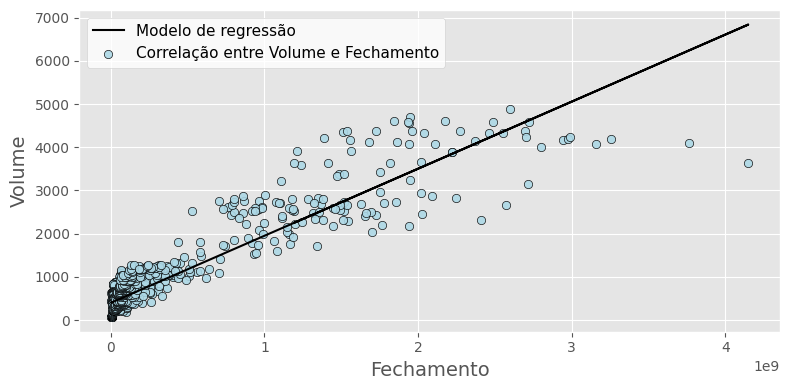

In [40]:
exibir2()
while True:
  print("Opcao 1:")
  op1 = int(input())
  print("Opcao 2:")
  op2 = int(input())
  if(op1>=1) and (op1<=6) and (op1>=1) and (op1<=6):
    if(op1!=op2):
      mudaOpReg(op1, op2)
      break
    else:
      print("Opçoes nao podem ser iguais!")
  else:
    print("Favor usar somente numeros que correspondam a uma opçao!")
  if not (op1>=1) and (op1<=6) and (op2>=1) and (op2<=6) and (op1!=op2):
    break


------------------------------------------------------------
               Escolher forma de inserir dados:             
------------------------------------------------------------
Escolha os dados para efetuar o gráfico de regressão linear:
1 - Digitar valores
2 - Arquivo inserido no projeto
------------------------------------------------------------
2
-------------------------------------------------------------------------------
Insira o nome do arquivo (extensao csv inclusa). Ex: lista.csv
-------------------------------------------------------------------------------
BitCoin.csv
1 - Unnamed: 0
2 - Date
3 - Open
4 - High
5 - Low
6 - Close
7 - Volume
8 - Market Cap
-------------------------------------------------------------------------------
Insira o numero correspondente da primeira coluna (numérica): 
6
Insira o numero correspondente da segunda coluna (numérica): 
5


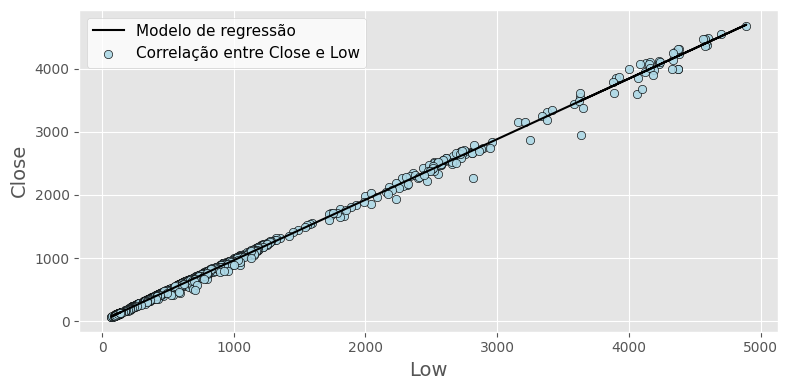

In [46]:
exibir3()
while True:
  op = int(input()) 
  if (op == 1):
    exibir4()
    get_series()
    break
  elif (op == 2):
    exibir5()
    arquivo_csv = input()
    df = pd.read_csv(arquivo_csv, sep=',')
    columns = df.columns
    i = 0
    # exibição das colunas do dataset escolhido
    for col in columns:
      i += 1
      print(str(i) + " - " + col)
    print("-------------------------------------------------------------------------------")
    x = int(input(print("Insira o numero correspondente da primeira coluna (numérica): ")))
    y = int(input(print("Insira o numero correspondente da segunda coluna (numérica): ")))
    lerArquivo(arquivo_csv, x - 1, y - 1)
    break
  else:
    print("Favor usar somente numeros que correspondam a uma opçao!")
  if not (op1>=1) and (op1<=6):
    break